<a href="https://colab.research.google.com/github/raunaksatone5/EDA-on-Uber-Data/blob/main/Exploratory_Data_Analysis_on_Uber_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Uber Case Study </b>

## <u>**First of all, let's understand the business domain**</u>
#### Ridesharing is when people use a service to get a ride on short notice. It's a market with a lot of changes in demand based on factors like time, place, weather, and events. The key to success in ridesharing is to be able to understand how demand changes and provide rides when people need them.

## <u>**Objective:**</u>
#### As a newly hired Data Analyst in you have been given the task of extracting actionable insights from data that will help in the growth of the the business. 



## <u>**Questions the Uber management are asking**</u>
### 1. What are the different variables that influence the number of pickups?
### 2. Which factor affects the number of pickups the most? What could be the possible reasons for that?
### 3. What are your recommendations to Uber management to capitalize on fluctuating demand?

## <u> **Well what do we have in the Data?**</u>
### The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (hourly)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

### **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

### **Loading the dataset**

In [ ]:
df = pd.read_csv('Uber_Data.csv')
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 01:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 01:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 01:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 01:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


### **Checking the shape of the dataset**

In [ ]:
df.shape

(29101, 13)

###**Checking the data types of the columns for the dataset**

In [ ]:
df.info()

# Age - Numerical (Intger, Float)
# Object --> Age --> inspect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


### **Getting the statistical summary for the dataset**

In [ ]:
df.describe()

# statistical summary of every column
# distribution of every column - skew
# outlier - influential, noisy
# variation

# Skew --> there might be a chance I have to remove the skew - Data Transformation 
# ML model can fit better to data


,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,28742.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.900019,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.798783,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


#### **Let's check the count of each unique category in each of the categorical/object type variables.**

In [ ]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [ ]:
nan --> not a number

In [ ]:
df['borough'].nunique()

6

- *We can observe that there are 6 unique boroughs present in the dataset for New York*

In [ ]:
df['hday'].value_counts(normalize=True)

N    0.961479
Y    0.038521
Name: hday, dtype: float64

In [ ]:
df['borough'].value_counts(normalize=True)

Bronx            0.166667
Brooklyn         0.166667
EWR              0.166667
Manhattan        0.166667
Queens           0.166667
Staten Island    0.166667
Name: borough, dtype: float64

#### **Standardise the datatypes**

In [ ]:
# Let us change the data type of pickup_dt to date-time format.
df['pickup_dt'][:5]

0    01-01-2015 01:00
1    01-01-2015 01:00
2    01-01-2015 01:00
3    01-01-2015 01:00
4    01-01-2015 01:00
Name: pickup_dt, dtype: object

In [ ]:
# Datetime --> Standard format for python 
# YYYY-mm-dd H:M:S

# dd-mm-yyyy h:m

In [ ]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d-%m-%Y %H:%M")

In [ ]:
df['pickup_dt'][:5]
# yyy-mm-dd H:M:S

0   2015-01-01 01:00:00
1   2015-01-01 01:00:00
2   2015-01-01 01:00:00
3   2015-01-01 01:00:00
4   2015-01-01 01:00:00
Name: pickup_dt, dtype: datetime64[ns]

Let's check the data types of the columns again to ensure that the change has been executed properly.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


Now let's check the range of time period for which the data has been collected.

In [ ]:
df['pickup_dt'].min() # Start Date

Timestamp('2015-01-01 01:00:00')

In [ ]:
df['pickup_dt'].max() # End Date

Timestamp('2015-06-30 23:00:00')

In [ ]:
Feature Engineering --> Deriving useful features from raw data

In [ ]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


#### **Extracting date parts from pickup date**

In [ ]:
# df.pickup_dt.dt

# <df><column>.dt.display
# multiple functions

In [ ]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year # extracting the year from the date
df['start_month'] = df.pickup_dt.dt.month_name() # extracting the month name from the date
df['start_hour'] = df.pickup_dt.dt.hour # extracting the hour from the time
df['start_day'] = df.pickup_dt.dt.day # extracting the day from the date
df['week_day'] = df.pickup_dt.dt.day_name() # extracting the day of the week from the date

# 

In [ ]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday


In [ ]:
df.shape

(29101, 18)

**We have earlier seen that the `borough` and `temp` columns have missing values in them. So let us see them in detail before moving on to do our EDA.**

### **Missing value treatment**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.


In [ ]:
# checking missing values across each columns
df.isnull().sum()

pickup_dt         0
borough        3043
pickups           0
spd               0
vsb               0
temp            359
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

In [ ]:
Type
Categorical --> 
Numerical --> 

Let us first see the missing value of the `borough` column in detail.

In [ ]:
# Checking the missing values further
df.borough.value_counts(normalize=True, dropna=False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

In [ ]:
Filling the misisng Value --> Imputation

# most frequent category

In [ ]:
# Replace the null values present in the borough column with a new label as Unknown
df['borough'].fillna('Unknown', inplace = True) 

In [ ]:
df.borough.value_counts(normalize=True, dropna=False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
Unknown          0.104567
Name: borough, dtype: float64

In [ ]:
df.isnull().sum()

pickup_dt        0
borough          0
pickups          0
spd              0
vsb              0
temp           359
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
start_year       0
start_month      0
start_hour       0
start_day        0
week_day         0
dtype: int64

The missing values in the `borough` column have been treated. Let us now move on to `temp` variable and see how to deal with the missing values present there.

In [ ]:
df.loc[df['temp'].isnull() == True]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,1,2,1,Thursday
15,2015-01-01 03:00:00,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,1,3,1,Thursday
22,2015-01-01 04:00:00,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,1,4,1,Thursday
29,2015-01-01 05:00:00,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,1,5,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2015-01-15 19:00:00,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,1,19,15,Thursday
2340,2015-01-15 20:00:00,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,1,20,15,Thursday
2347,2015-01-15 21:00:00,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,1,21,15,Thursday
2354,2015-01-15 22:00:00,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,1,22,15,Thursday


In [ ]:
df.loc[df['temp'].isnull()==True,'borough'].value_counts()

Brooklyn    359
Name: borough, dtype: int64

In [ ]:
df.loc[df['temp'].isnull()==True,'start_month'].value_counts()

1    359
Name: start_month, dtype: int64

In [ ]:
# Fixing Temp
df['temp'] = df['temp'].fillna(value = df.loc[ (df['start_month'] == 'January'),'temp'].mean())

In [ ]:
# Checking the sum of null values across columns
df.isnull().sum()

pickup_dt      0
borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

### After doing so much hard work, we are now ready to do some exploratory analysis on the dataset. This is pretty common, where we need to spend some time cleaning and processing the data to make it useful for analysis. Else we will just get garbage insights 😬

## <u>**Exploratory Data Analysis**</u>

### **Univariate Analysis**

In [ ]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,47.900019,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.000000,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday


In [ ]:
# Setting the size of the plots inline
sns.set(rc = {'figure.figsize': (11.7,6.27) })

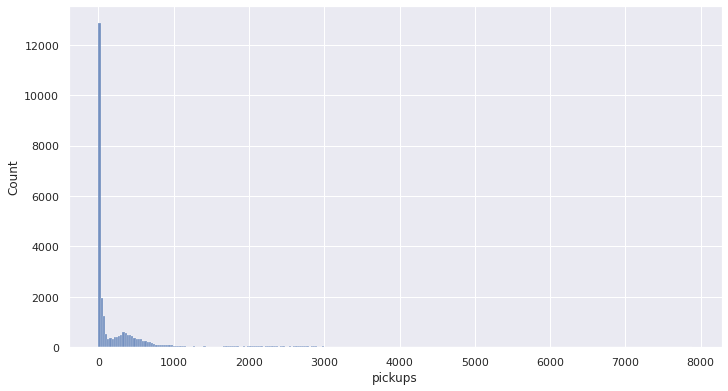

In [ ]:
# Getting the pickup distribution
sns.histplot(data = df, x = 'pickups')
plt.show()

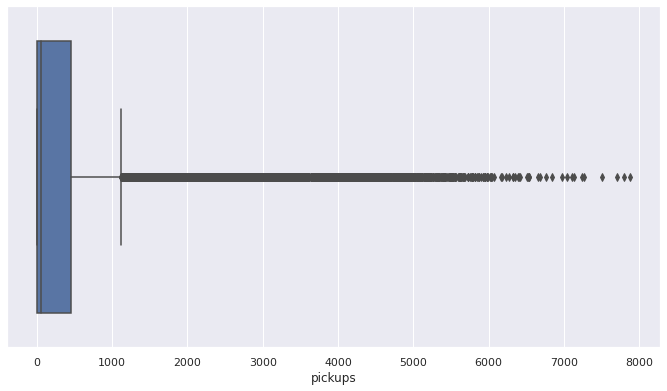

In [ ]:
# Getting the box plot distribution of pickups
sns.boxplot(data=df,x='pickups')
plt.show()

## Observation

1.   Outliers present
2.   Skewed
3.   BiModal distribution



####  **Observations on Visibility**

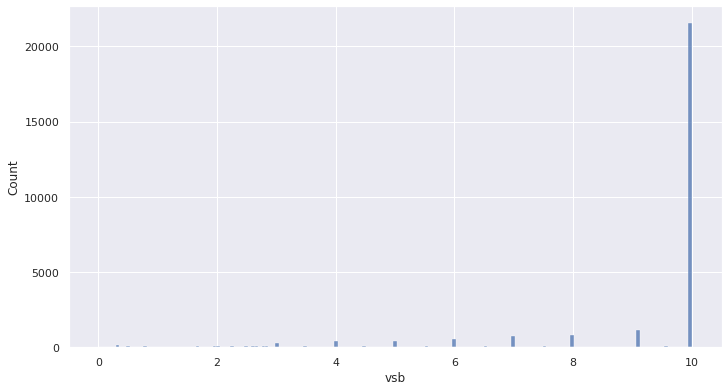

In [ ]:
# Getting the visibility distribution
sns.histplot(data=df, x = 'vsb')
plt.show()

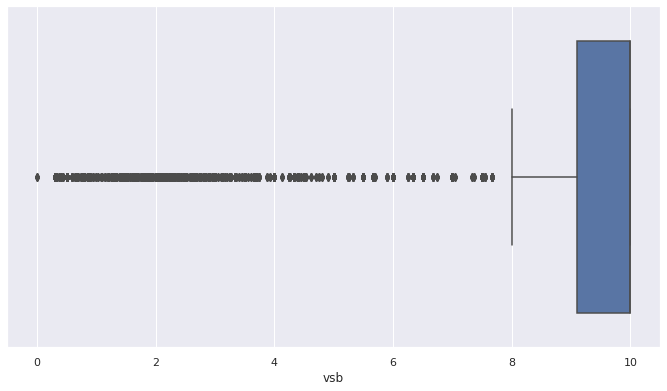

In [ ]:
# Getting the box plot distribution for visibility in miles
sns.boxplot(data=df, x = 'vsb')
plt.show()

### **Observations on Temperature**

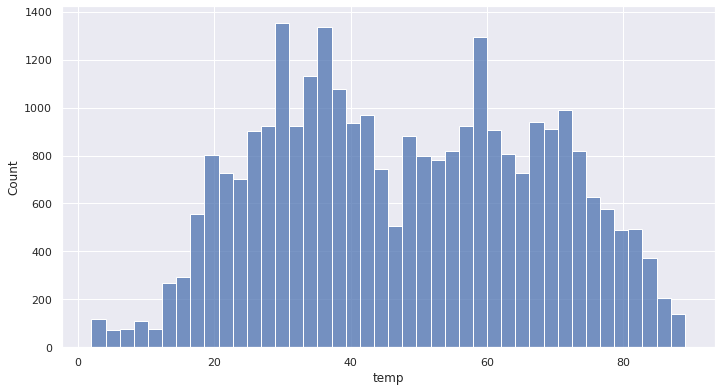

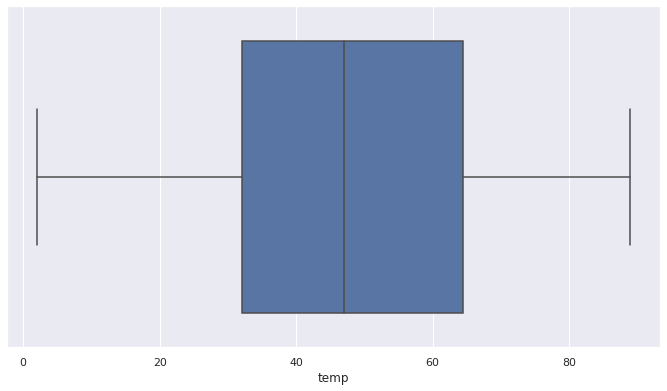

In [ ]:
sns.histplot(data=df, x = 'temp')
plt.show()
sns.boxplot(data=df,x = 'temp')
plt.show()

#### **Observations on Dew point**

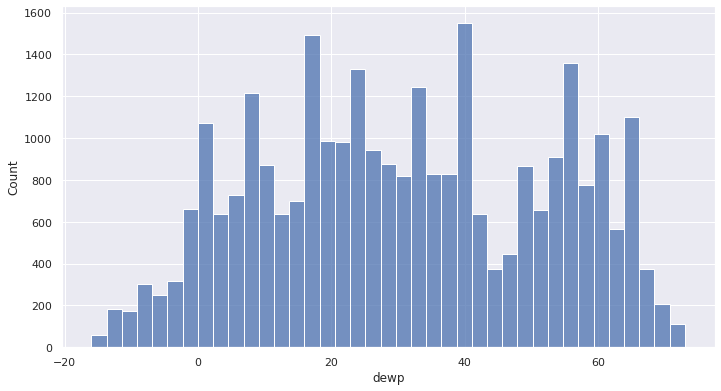

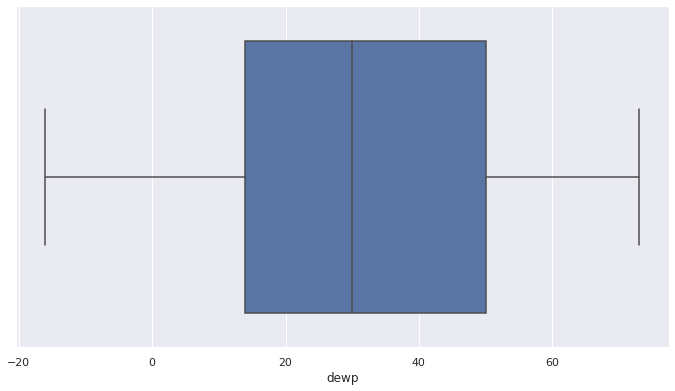

In [ ]:
sns.histplot(data=df,x='dewp')
plt.show()
sns.boxplot(data=df,x='dewp')
plt.show()

#### **Observations on Sea level pressure**

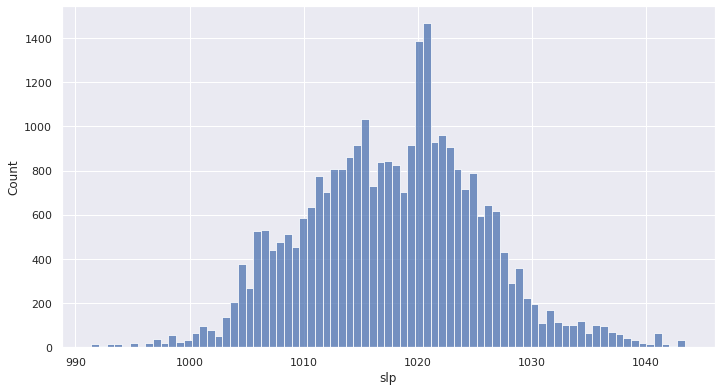

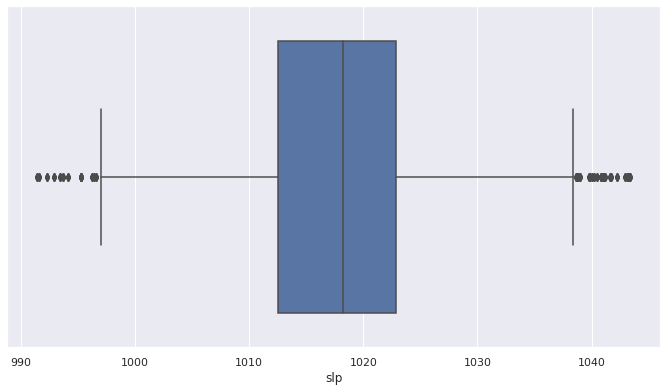

In [ ]:
sns.histplot(data=df,x='slp')
plt.show()
sns.boxplot(data=df,x='slp')
plt.show()

###  **Observations on Liquid Precipitation (Rain)**

#### **1 hour liquid precipitation**

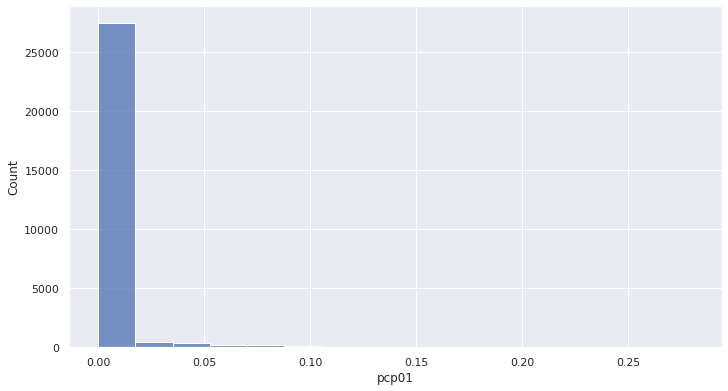

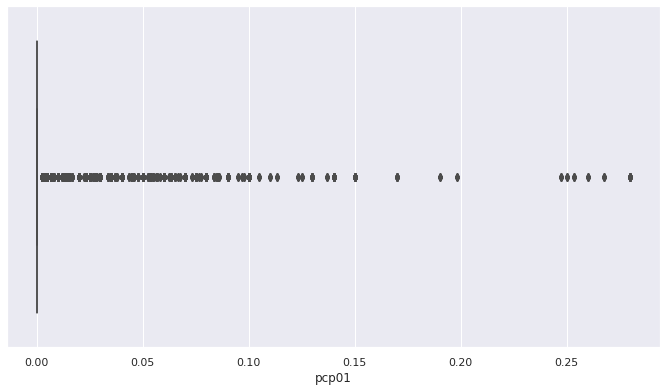

In [ ]:
sns.histplot(data=df,x='pcp01')
plt.show()
sns.boxplot(data=df,x='pcp01')
plt.show()

#### **6 hour liquid precipitation**

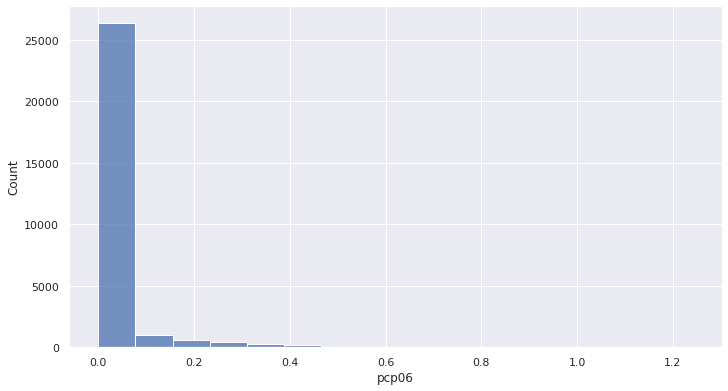

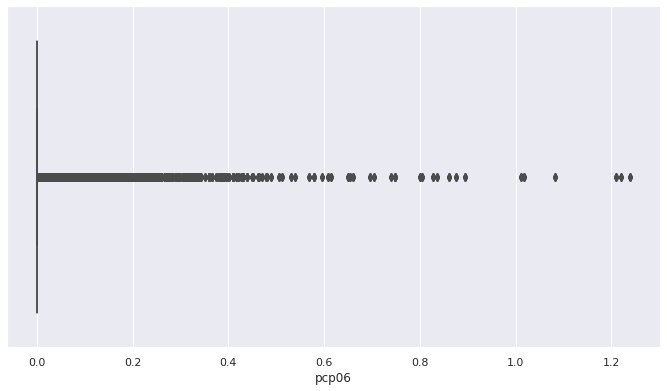

In [ ]:
sns.histplot(data=df,x='pcp06')
plt.show()
sns.boxplot(data=df,x='pcp06')
plt.show()

#### **24 hour liquid precipitation**

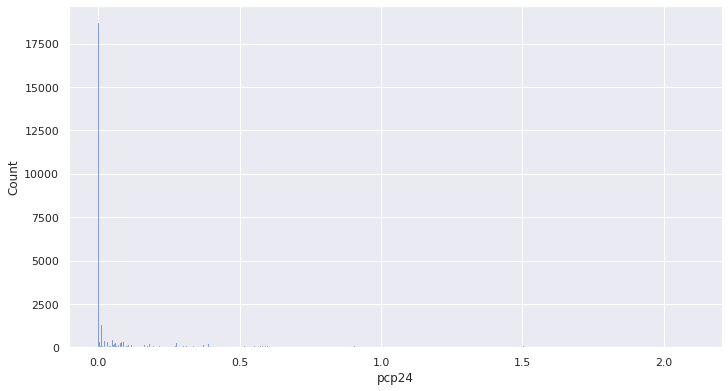

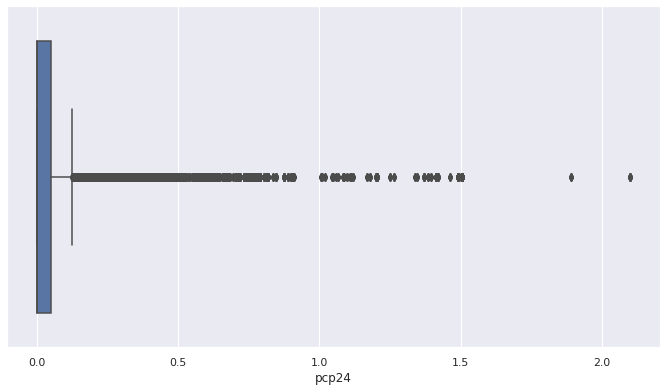

In [ ]:
sns.histplot(data=df,x='pcp24')
plt.show()
sns.boxplot(data=df,x='pcp24')
plt.show()

### **Observations on Snow Depth**

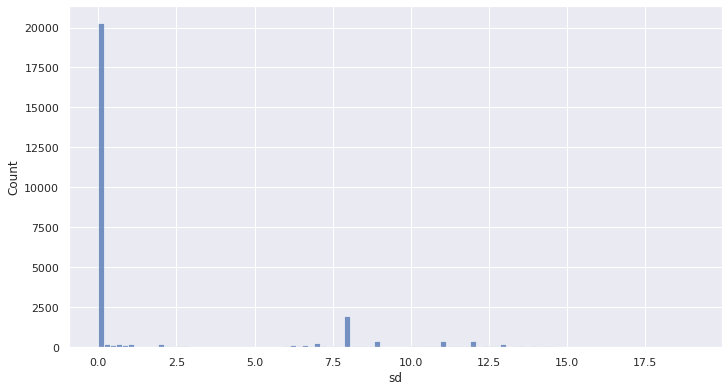

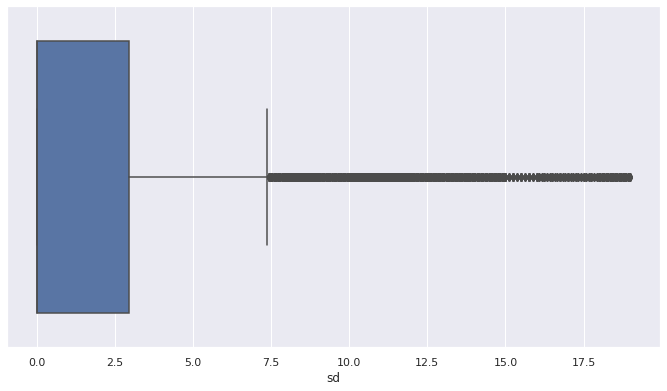

In [ ]:
sns.histplot(data=df,x='sd')
plt.show()
sns.boxplot(data=df,x='sd')
plt.show()

### **Let's explore the categorical variables now**

#### **Observations on holiday**

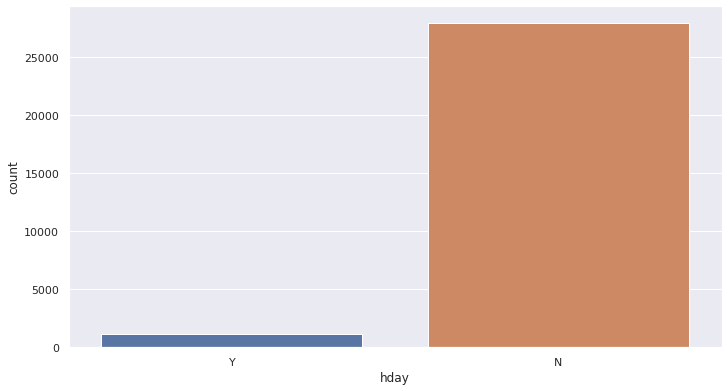

In [ ]:
# Getting the distribution for holiday variable
sns.countplot(data=df, x='hday')

### **Observations on borough**

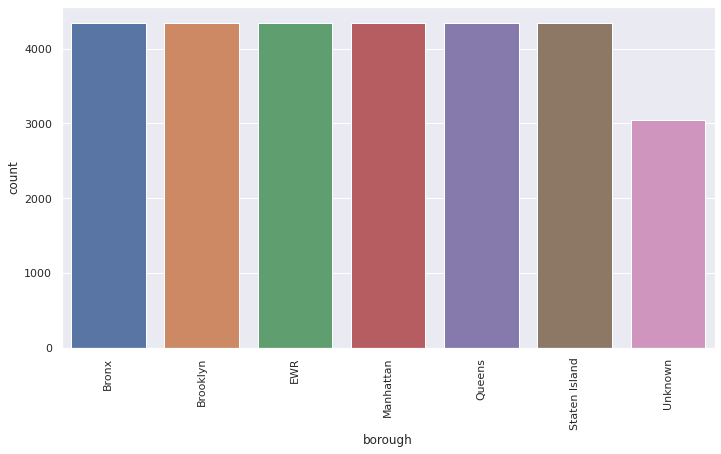

In [ ]:
sns.countplot(data=df,x='borough');
plt.xticks(rotation = 90);

## <u> **Bivariate Analysis**

### Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.



## **Correlation by Heatmap**

In [ ]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()
corr

# -1 to 1
# 1: positive
# -1: negative

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054146,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.291805,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.026400,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054146,-0.291805,0.026400,1.000000,0.889635,-0.213800,-0.014114,-0.039662,-0.016387,-0.558519
dewp,0.033456,-0.321730,-0.232188,0.889635,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.015011,-0.091698,0.165451,-0.213800,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,0.004406,-0.000250,-0.487121,-0.014114,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,-0.002909,0.016266,-0.117681,-0.039662,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.020219,-0.010563,0.000323,-0.016387,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,-0.008241,0.097919,-0.048110,-0.558519,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


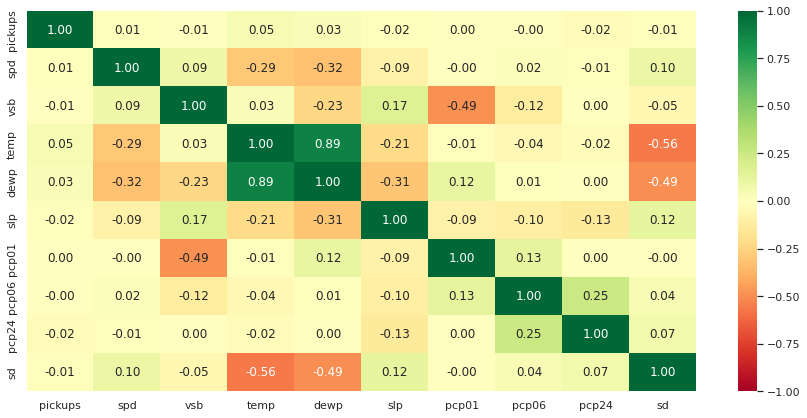

In [ ]:
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdYlGn") # Spectral
plt.show()

#### Now let's check the trend between pickups across different time based variables

### **Pickups across months**

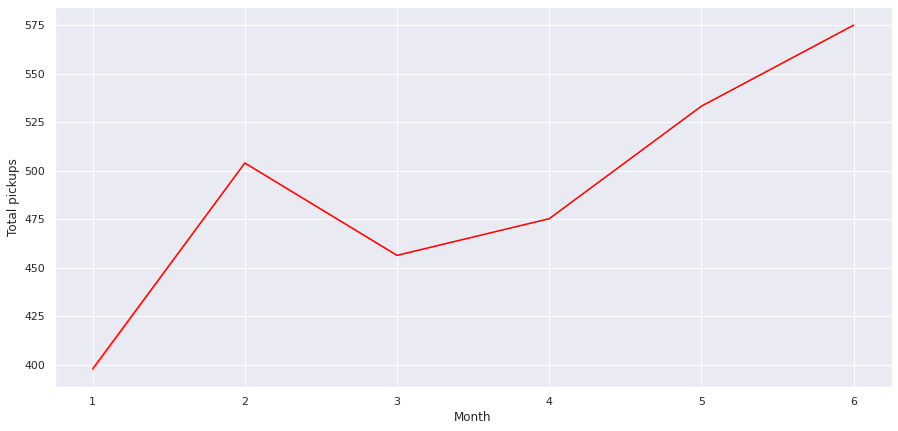

In [ ]:
# Understanding the trend of pickups across months
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_month", y="pickups", ci=False, color="red", estimator='mean')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

#### **Pickups vs Days of the Month**

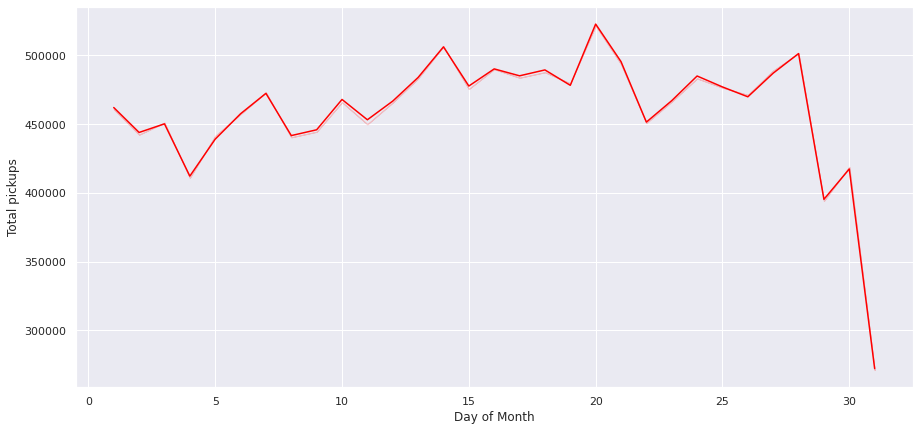

In [ ]:
plt.fgure(figsize=(15,7))
sns.lineplot(data=df, x="start_day", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

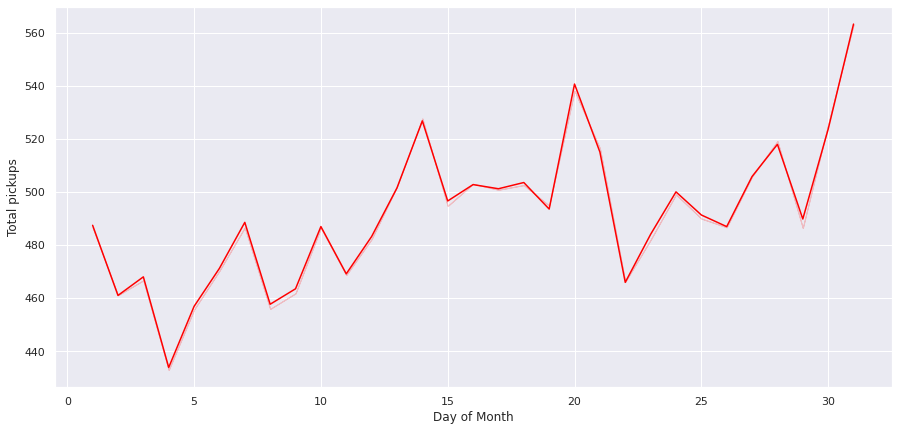

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_day", y="pickups", estimator='mean', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

#### **Pickups across Hours of the Day**

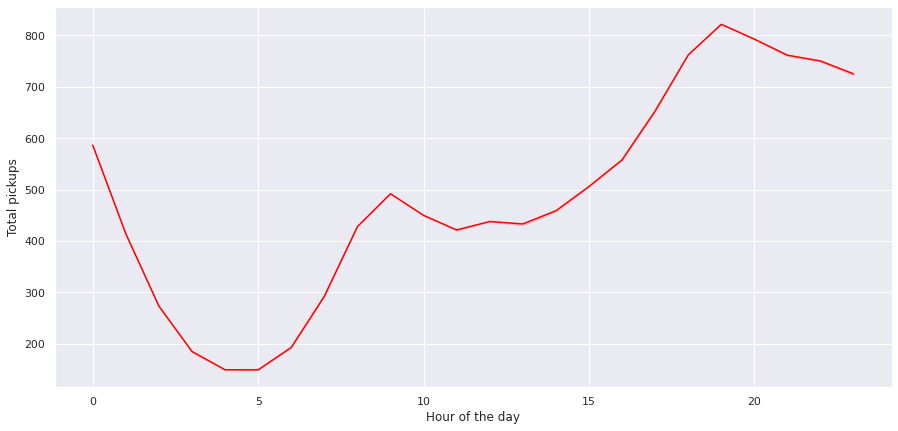

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_hour", y="pickups", estimator='mean', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

### **What is the trend of Pickups across Weekdays**

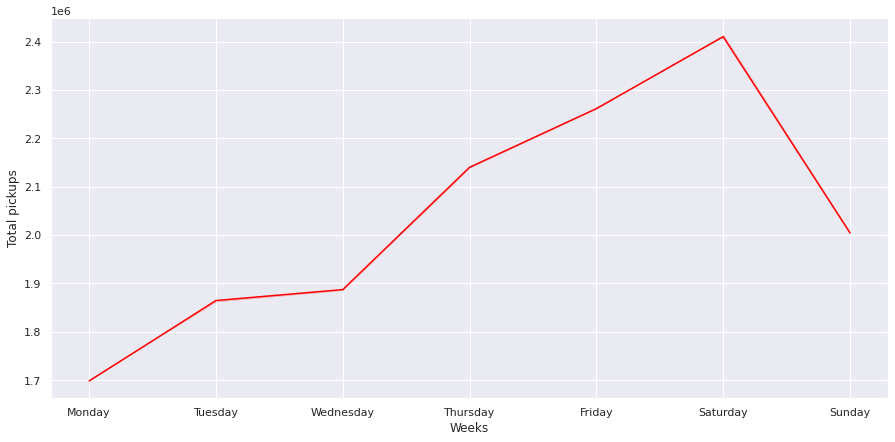

In [ ]:
# Getting the trend of pickups across weekdays
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="week_day", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Weeks')
plt.show()

### **Outlier Detection and Treatment**

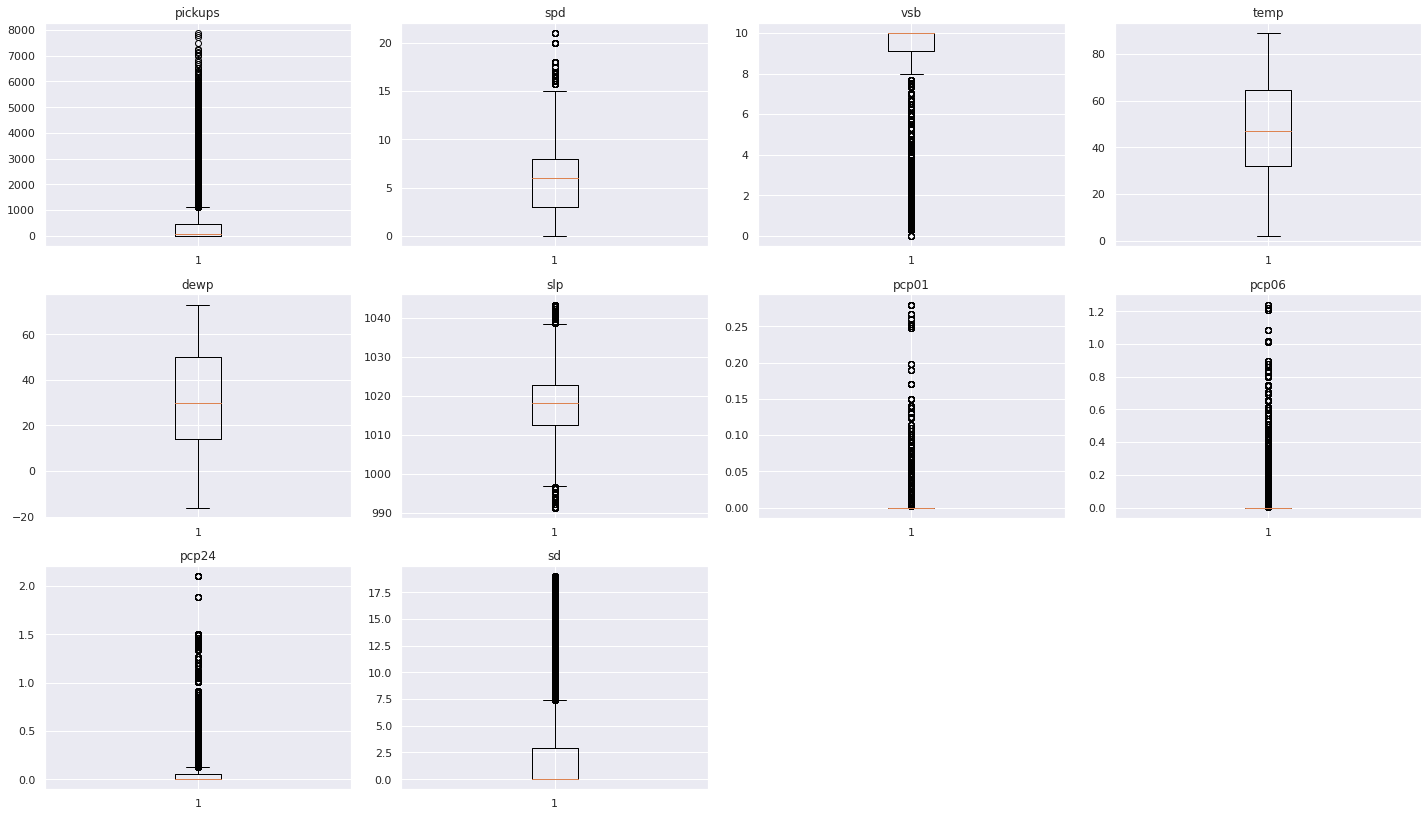

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

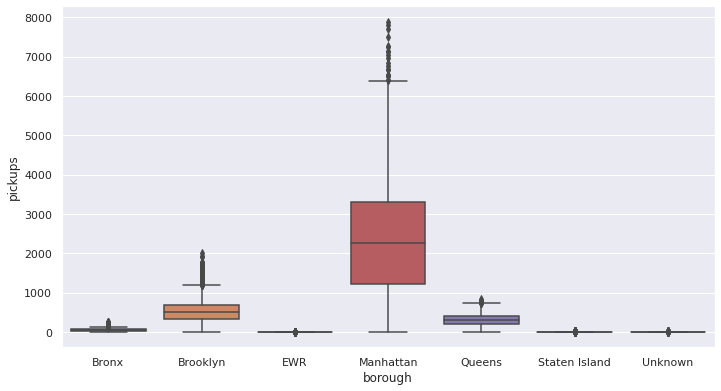

In [ ]:
# Bivariate
sns.boxplot(data = df, y='pickups', x='borough');

# Num-Cat

## **Insights**

1. Popular in Manhattan
2. Rides are high during 8-10am, 7pm
3. not so great during winter
4. trend increasing from jan to june
5. saturdays rides are high


